In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cleaned_dynamic_pricing_data.csv')
df.head

<bound method NDFrame.head of      ActivitySiteID      ActivityDescription BookingStartTime  MaxBookees  \
0               HXP  20-20-20  2.45pm-3.45pm         14:45:00          25   
1               HXP  20-20-20  2.45pm-3.45pm         14:45:00          25   
2               HXP  20-20-20  2.45pm-3.45pm         14:45:00          25   
3               HXP  20-20-20  2.45pm-3.45pm         14:45:00          25   
4               HXP  20-20-20  2.45pm-3.45pm         14:45:00          25   
...             ...                      ...              ...         ...   
3266            TSC       Zumba  6.30-7.30pm         18:30:00          18   
3267            TSC       Zumba  6.30-7.30pm         18:30:00          18   
3268            TSC            Zumba - 6-7pm         18:00:00          50   
3269            TSC            Zumba - 6-7pm         18:00:00          50   
3270            TSC            Zumba - 6-7pm         18:00:00          50   

      Number Booked  Price (INR)  BookingEndD

In [5]:
df['Hour'] = pd.to_datetime(df['BookingStartTime'], format='%H:%M:%S').dt.hour
df['Log_Price'] = np.log(df['Price (INR)'] + 1)
df['Log_Booked'] = np.log(df['Number Booked'] + 1)
df

,ActivitySiteID,ActivityDescription,BookingStartTime,MaxBookees,Number Booked,Price (INR),BookingEndDateTime,MaxBookees_scaled,Number Booked_scaled,Price_scaled,Hour,Log_Price,Log_Booked
0,HXP,20-20-20 2.45pm-3.45pm,14:45:00,25,12,499.0,NaN,-0.477833,-0.538786,-1.708124,14,6.214608,2.564949
1,HXP,20-20-20 2.45pm-3.45pm,14:45:00,25,15,499.0,NaN,-0.477833,-0.223458,-1.708124,14,6.214608,2.772589
2,HXP,20-20-20 2.45pm-3.45pm,14:45:00,25,14,499.0,NaN,-0.477833,-0.328567,-1.708124,14,6.214608,2.708050
3,HXP,20-20-20 2.45pm-3.45pm,14:45:00,25,9,499.0,NaN,-0.477833,-0.854114,-1.708124,14,6.214608,2.302585
4,HXP,20-20-20 2.45pm-3.45pm,14:45:00,25,7,499.0,NaN,-0.477833,-1.064333,-1.708124,14,6.214608,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,TSC,Zumba 6.30-7.30pm,18:30:00,18,9,1299.0,NaN,-0.940824,-0.854114,-0.698680,18,7.170120,2.302585
3267,TSC,Zumba 6.30-7.30pm,18:30:00,18,9,1299.0,NaN,-0.940824,-0.854114,-0.698680,18,7.170120,2.302585
3268,TSC,Zumba - 6-7pm,18:00:00,50,16,1299.0,NaN,1.175706,-0.118348,-0.698680,18,7.170120,2.833213
3269,TSC,Zumba - 6-7pm,18:00:00,50,13,1299.0,NaN,1.175706,-0.433677,-0.698680,18,7.170120,2.639057


In [6]:
X = df[['Log_Price', 'Hour']]
y = df['Log_Booked']

In [9]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
y_pred = model.predict(X)
r2 = model.score(X, y)
mse = ((y - y_pred) ** 2).mean()

print(f'R2: {r2:.2f}, MSE: {mse:.2f}')
print(f'Price Elasticity: {model.coef_[0]:.2f}')

R2: 0.04, MSE: 0.43
Price Elasticity: -0.28


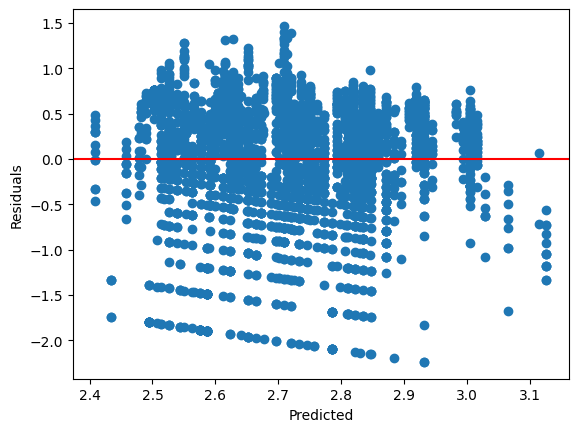

In [11]:
plt.scatter(y_pred, y - y_pred)
plt.axhline(0, color='r')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.savefig('residuals.png')